## RNN + LSTM을 위한 공부-2
#### 순환 신경망으로 IMDB 리뷰 분류하기
텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것임. 공백을 기준으로 하고 부린된 단어를 토큰이라고 부름  
여기서 토큰에 할당 된 정수 중에 0은 패딩 1은 문장의 시작 2는 어휘 사전에 없는 토큰으로 사용.

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #패딩시켜주는 좋은 친구
train_seq = pad_sequences(train_input, maxlen=100)

In [6]:
val_seq = pad_sequences(val_input, maxlen=100)

In [7]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
train_oh = keras.utils.to_categorical(train_seq)

In [9]:
val_oh = keras.utils.to_categorical(val_seq)

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer= rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data = (val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 73ms/step - loss: 0.7071 - accuracy: 0.4990 - val_loss: 0.7049 - val_accuracy: 0.4936
Epoch 2/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6900 - accuracy: 0.5336 - val_loss: 0.6748 - val_accuracy: 0.5804
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6597 - accuracy: 0.6261 - val_loss: 0.6499 - val_accuracy: 0.6460
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6361 - accuracy: 0.6691 - val_loss: 0.6308 - val_accuracy: 0.6816
Epoch 5/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6157 - accuracy: 0.6979 - val_loss: 0.6119 - val_accuracy: 0.6988
Epoch 6/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5979 - accuracy: 0.7146 - val_loss: 0.5949 - val_accuracy: 0.7158
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5813 - accuracy: 0.7301 - val_loss: 0.5800 - val_ac

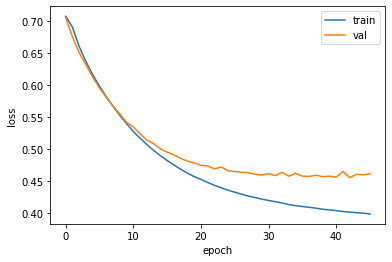

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
print(train_seq.nbytes, train_oh.nbytes) #원-핫 인코딩으로 변환하면 입력 데이터가 커짐

8000000 4000000000


그래서 나온 것이 뭐냐
## 바로 단어 임베딩~

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 88ms/step - loss: 0.6942 - accuracy: 0.5099 - val_loss: 0.6898 - val_accuracy: 0.5344
Epoch 2/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6820 - accuracy: 0.5747 - val_loss: 0.6767 - val_accuracy: 0.6032
Epoch 3/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6634 - accuracy: 0.6424 - val_loss: 0.6565 - val_accuracy: 0.6592
Epoch 4/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6420 - accuracy: 0.6881 - val_loss: 0.6392 - val_accuracy: 0.6900
Epoch 5/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6229 - accuracy: 0.7193 - val_loss: 0.6240 - val_accuracy: 0.7072
Epoch 6/100
313/313 [==============================] - 27s 88ms/step - loss: 0.6054 - accuracy: 0.7344 - val_loss: 0.6093 - val_accuracy: 0.7200
Epoch 7/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5896 - accuracy: 0.7455 - val_loss: 0.5968 - val_ac

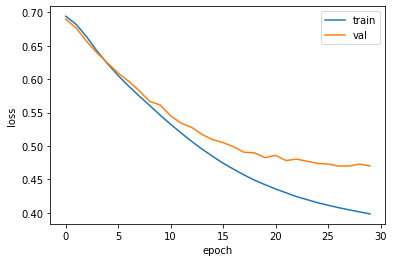

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()